# 实现线性回归 

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 生成数据集

In [2]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)

In [3]:
print("features:",features[0],"\nlabels:",labels[0])

features: tensor([ 0.5400, -0.5942]) 
labels: tensor([7.3026])


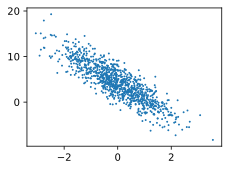

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

## 读取数据集 

In [5]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #打乱列表
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(
            #被打乱列表中的一段
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]        

In [6]:
batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([[-1.0216, -0.0060],
        [-0.2559, -1.0279],
        [ 0.3100, -1.6773],
        [-0.5510, -0.7449],
        [ 1.1258, -0.2440],
        [ 0.9393,  0.8895],
        [-1.1258,  0.5055],
        [ 0.4882,  0.2936],
        [ 0.4964, -0.3941],
        [-1.0614,  1.0058]]) 
 tensor([[ 2.1660],
        [ 7.1765],
        [10.5312],
        [ 5.6319],
        [ 7.2653],
        [ 3.0484],
        [ 0.2430],
        [ 4.1738],
        [ 6.5087],
        [-1.3321]])


## 初始化模型参数 

In [7]:
w = torch.normal(0,0.01,size=(2,1),requires_grad = True)
b = torch.zeros(1,requires_grad = True)

## 定义模型 

## 定义损失函数 

## 定义优化算法 

In [8]:
lr = 0.03
num_epochs = 3
net = d2l.linreg
loss = d2l.squared_loss

In [9]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        d2l.sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch +1},loss {float(train_l.mean()):f} ')

epoch 1,loss 0.027802 
epoch 2,loss 0.000101 
epoch 3,loss 0.000050 


In [10]:
print(f'w的估计误差:{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b-b}')

w的估计误差:tensor([-1.2970e-04,  1.3590e-05], grad_fn=<SubBackward0>)
b的估计误差:tensor([0.0009], grad_fn=<RsubBackward1>)
